In [26]:
#2 In a new notebook, import nltk and run the following commands:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/minhphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minhphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/minhphan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Q3

## The Situation
Harvard President Claudine Gay faced plagiarism allegations in late 2023 following controversial congressional testimony on antisemitism. The Washington Free Beacon reported over 40 allegations across seven publications. Harvard's review found "inadequate citation" issues, and Gay agreed to submit corrections to her 1997 dissertation and published articles. This controversy emerged during her first semester as Harvard's first Black president.

## Fox New Report 
Fox News reports factual information but uses loaded language like "embattled" and "slapped with" in headlines to drive readers into detail. The article emphasizes political angles, highlighting NAACP's "white supremacist agenda" defense claims and comparing faculty-student plagiarism consequences. While including verified details from investigations, the dramatic framing and judgmental tone undermine objectivity. T

## Reuters Report
Reuters delivers straightforward, factual reporting with neutral language throughout. The article focuses on  actions—dissertation corrections, committee findings, and investigation timelines—without sensationalizing. It mentions the congressional testimony and the appropriate meaning without centering the story around it. The tone using phrases like "planning to submit" maintains neutral. However, the article is relatively brief and could provide more depth about specific citation issues. 

4. Use PyPDF2 to extract the text out of each document
a. Display the text
b. Briefly note any anomalies in your notebook
5. Use NLTK to complete sentiment analysis for each of the articles
a. Compare the results from the two articles
b. Compare the results to your reading of the articles; do you agree with the outcome?
6. Run sentiment analysis on the article headlines
a. Do those results agree with the overall sentiment?
7. Using py-readability-metrics complete 2-3 different readability scores
a. Discuss what the chosen metric is measuring
b. Compare the scores from both articles
8. Using wordcloud, create word clouds for both articles
a. Briefly comment on the word clouds


In [ ]:
#4 Use PyPDF2 to extract the text out of each document
import PyPDF2
import os
doc1 = ""
with open('data/doc1.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    for page in reader.pages:
        doc1 += page.extract_text() + "\n"
print(doc1)


# b. Briefly note any anomalies in your notebook
# doc1 (Fox News) has some formatting issues, such as line breaks and spacing inconsistencies. Some characters may not be extracted correctly, leading to potential misinterpretation of the text. Additionally, any images or non-text elements in the PDF are not captured in the extracted text.

In [ ]:
doc2 = ""
with open('data/doc2.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    for page in reader.pages:
        doc2 += page.extract_text() + "\n"
print(doc2)

# b. Briefly note any anomalies in your notebook
# doc2 (Reuters) has fewer formatting issues compared to doc1, but there are still some line breaks and spacing inconsistencies. Similar to doc1, any images or non-text elements in the PDF are not captured in the extracted text. Overall, the extraction quality is better than doc1, but some minor issues may still affect readability.

In [ ]:
#5. Use NLTK to complete sentiment analysis for each of the articles
#Compare the results from the two articles

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment_doc1 = sia.polarity_scores(doc1)
sentiment_doc2 = sia.polarity_scores(doc2)
print("Sentiment Analysis for Document 1 (Fox News):", sentiment_doc1)
print("Sentiment Analysis for Document 2 (Reuters):", sentiment_doc2)  

# Compare the results to your reading of the articles; do you agree with the outcome?
# Fox News has a more positive tone based on the analysis despite inital comment I was seeing alot of strong words like a scandal (maybe using less harsh language or including more balanced/defensive perspectives)
# Reuters has a very negative compound score despite the tone when we first read indicate it was staying neutral, likely because they're using more straightforward, critical language about the plagiarism allegations without softening it

In [ ]:
#Q6: Run sentiment analysis on the article headlines
doc1_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
doc2_headline = "Harvard president will submit dissertation edits after plagiarism allegations"
headline_sentiment_doc1 = sia.polarity_scores(doc1_headline)
headline_sentiment_doc2 = sia.polarity_scores(doc2_headline)
print("Sentiment Analysis for Document 1 Headline (Fox News):", headline_sentiment_doc1)
print("Sentiment Analysis for Document 2 Headline (Reuters):", headline_sentiment_doc2)


Sentiment Analysis for Document 1 Headline (Fox News): {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Sentiment Analysis for Document 2 Headline (Reuters): {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


# Do those results agree with the overall sentiment?
# Fox News: Uses a dramatic, negative headline to grab attention, but the article body might include more defensive quotes, supportive statements, or balanced perspectives that make it read more positively overall.
# Reuters: Uses a completely neutral, factual headline, but the article body uses stronger critical language about the misconduct and violations.

In [23]:
# Q7: Using py-readability-metrics complete 2-3 different readability scores
# Discuss what the chosen metric is measuring
from readability import Readability

# Calculate readability scores for both documents
r1 = Readability(doc1)
r2 = Readability(doc2)

# Flesch-Kincaid Grade Level: Indicating that readers at U.S. school grade level can able to understand the text.
flesch_kincaid_doc1 = r1.flesch_kincaid()
flesch_kincaid_doc2 = r2.flesch_kincaid()

# Gunning Fog Index: Estimates the years of formal education needed to understand the text on first reading.
gunning_fog_doc1 = r1.gunning_fog()
gunning_fog_doc2 = r2.gunning_fog()

# Dale-Chall Score: Measures readability based on word difficulty and sentence length
dale_chall_doc1 = r1.dale_chall()
dale_chall_doc2 = r2.dale_chall()

print("Readability Scores for Document 1 (Fox News):")
print("Flesch-Kincaid Grade Level:", flesch_kincaid_doc1)
print("Gunning Fog Index:", gunning_fog_doc1)
print("Dale-Chall Score:", dale_chall_doc1)
print("\nReadability Scores for Document 2 (Reuters):")
print("Flesch-Kincaid Grade Level:", flesch_kincaid_doc2)
print("Gunning Fog Index:", gunning_fog_doc2)
print("Dale-Chall Score:", dale_chall_doc2)

Readability Scores for Document 1 (Fox News):
Flesch-Kincaid Grade Level: score: 19.21912993097889, grade_level: '19'
Gunning Fog Index: score: 21.868487077434633, grade_level: 'college_graduate'
Dale-Chall Score: score: 12.77964083329135, grade_levels: ['college_graduate']

Readability Scores for Document 2 (Reuters):
Flesch-Kincaid Grade Level: score: 18.02006831424553, grade_level: '18'
Gunning Fog Index: score: 18.87116736990155, grade_level: 'college_graduate'
Dale-Chall Score: score: 12.527085332529637, grade_levels: ['college_graduate']


# Flesch-Kincaid Grade Level

# Fox News: 19.2 (requires ~19 years of education)
# Reuters: 18.0 (requires ~18 years of education)
# Winner: Reuters (slightly easier to read)

# Gunning Fog Index

# Fox News: 21.9 (college graduate level)
# Reuters: 18.9 (college graduate level)
# Winner: Reuters (more accessible)

# Dale-Chall Score

# Fox News: 12.8 (college graduate)
# Reuters: 12.5 (college graduate)
# Winner: Reuters (simpler vocabulary)

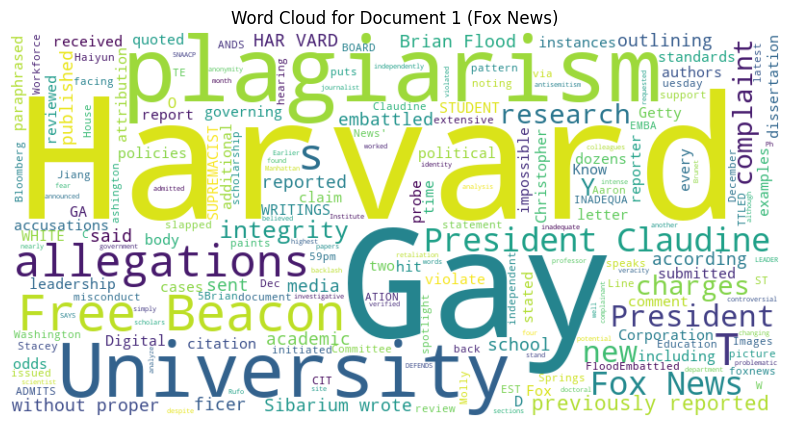

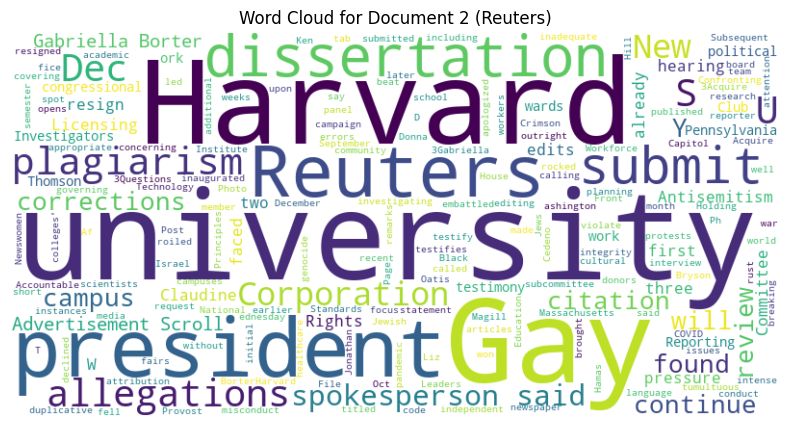

In [ ]:
#8 Using wordcloud, create word clouds for both articles
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate word cloud for Document 1 (Fox News)
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(doc1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Document 1 (Fox News)')
plt.show()

# Generate word cloud for Document 2 (Reuters)
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(doc2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Document 2 (Reuters)')
plt.show()

# Word Cloud comment

The Fox News word cloud highlight dramatic language like "plagiarism," "allegations," and "embattled," emphasizing scandal and conflict while showing their source "Free Beacon." In contrast, Reuters' word cloud focuses on procedural terms like "dissertation," "submit," and "corrections," framing the story around institutional processes and responses. Fox News uses more blaming vocabulary that creates a sense of controversy, while Reuters maintains neutral, action-oriented language.